<a href="https://colab.research.google.com/github/Akshitha2202/Amazon_Clone/blob/main/DAV_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Breach Survey**










**1.	Which organization has lost the highest number of records in total over the entire time period from 2000 to 2022? – Bubble Chart**



In [ ]:
import plotly.express as px
import pandas as pd
df = pd.read_csv('data.csv')
organization_records_lost = df.groupby('organisation')['records lost'].sum().reset_index()
fig = px.scatter(organization_records_lost, x='organisation', y='records lost',
                 hover_name='organisation', labels={'records lost': 'Records Lost', 'organisation': 'Organization Name'},
                 title='Data Breaches by Organization',
                 color='records lost', color_continuous_scale='Viridis',
                 size_max=40, template='plotly_dark')
fig.update_traces(marker=dict(size=12))
fig.show()


**# Data visualization using index and organization names**

In [ ]:
import plotly.express as px
import pandas as pd
df = pd.read_csv('data.csv')
organization_records_lost = df.groupby('organisation')['records lost'].sum().reset_index()
fig = px.scatter(organization_records_lost, x='organisation', y=None,
                 hover_name='organisation', labels={'records lost': 'Records Lost', 'organisation': 'Organization Name'},
                 title='Data Breaches by Organization',
                 color='records lost', color_continuous_scale='Viridis', template='plotly_dark')
fig.show()

**2	What is the trend in the relationship between the number of records lost and the year of the data breach across different organizations? – Bubble Chart**





In [ ]:
import plotly.express as px
import pandas as pd
df = pd.read_csv('data.csv')
df['year'] = df['year   '].apply(lambda x: pd.to_numeric(x, errors='coerce'))
fig = px.scatter(df, y='year', x='records lost', color='organisation',
                 labels={'records lost': 'Records Lost', 'year': 'Year'},
                 title='Relationship between Records Lost and Year',
                 template='plotly_dark',
                 hover_data={'year': True, 'records lost': True, 'organisation': True})
fig.update_xaxes(showline=False, zeroline=False, showticklabels=False)
fig.update_yaxes(title='Year')
fig.show()

**3.What organization experienced the highest total number of records lost due to data breaches, and how does it compare to other organizations? – Bar Chart**

In [ ]:
import pandas as pd
import plotly.graph_objects as go
data = pd.read_csv('data.csv')
records_lost_by_org = data.groupby('organisation')['records lost'].sum().reset_index()
records_lost_by_org = records_lost_by_org.sort_values(by='records lost', ascending=False)
fig = go.Figure()
fig.add_trace(go.Bar(
    x=records_lost_by_org['organisation'],
    y=records_lost_by_org['records lost'],
    marker_color='rgb(55, 83, 109)'
))
fig.update_layout(
    title='Total Records Lost by Organisation',
    xaxis=dict(
        title='Organisation',
        tickangle=-45
    ),
    yaxis=dict(
        title='Records Lost'
    ),
    plot_bgcolor='white'
)
fig.show()

**4.	What is the trend in the number of records lost over time due to data breaches? – Timeline Visualization**

In [ ]:
import pandas as pd
import plotly.graph_objects as go
data = pd.read('data.csv')
data['date'] = data['date'].str.strip()
data['date'] = pd.to_datetime(data['date'], errors='coerce', format='%b-%y')
data = data.dropna(subset=['date'])
timeline_summary = data.groupby(data['date'].dt.year)['records lost'].sum().reset_index()
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=timeline_summary['date'],
    y=timeline_summary['records lost'],
    mode='lines+markers',
    line=dict(color='rgb(31, 119, 180)'),
    marker=dict(color='rgb(31, 119, 180)', size=8)
))
fig.update_layout(
    title='Timeline Visualization: Records Lost Over Time',
    xaxis=dict(
        title='Year',
        tickmode='linear',
        dtick=1
    ),
    yaxis=dict(
        title='Records Lost'
    ),
    plot_bgcolor='white'
)
fig.show()

**5.	What are the primary sectors affected by data breaches among the top 30 organizations? – Sankey Diagram**

In [ ]:
import pandas as pd
import plotly.graph_objects as go
data = pd.read_csv("data.csv")
top_organizations = data['organisation'].value_counts().nlargest(30).index
data_top_organizations = data[data['organisation'].isin(top_organizations)]
pivot_table = data_top_organizations.pivot_table(index='organisation', columns='sector', aggfunc='size', fill_value=0)
nodes = list(pivot_table.index) + list(pivot_table.columns)
source_indices = [nodes.index(org) for org in pivot_table.index for _ in pivot_table.columns]
target_indices = [nodes.index(sec) for _ in pivot_table.index for sec in pivot_table.columns]
values = [count for row in pivot_table.values for count in row]
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes,
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
    )
)])

fig.update_layout(title_text="Data Breach Sankey Diagram for Top 30 Organizations (All Years)")
fig.show()




 **6.	What is the distribution of data breaches across different sectors and organizations? – Sankey Diagram**

In [ ]:
import pandas as pd
import plotly.graph_objects as go
data = pd.read_csv("data.csv")
pivot_table = data.pivot_table(index='organisation', columns='sector', aggfunc='size', fill_value=0)
nodes = list(pivot_table.index) + list(pivot_table.columns)
source_indices = [nodes.index(org) for org in pivot_table.index for _ in pivot_table.columns]
target_indices = [nodes.index(sec) for _ in pivot_table.index for sec in pivot_table.columns]
values = [count for row in pivot_table.values for count in row]
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes,
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
    )
)])

fig.update_layout(title_text="Data Breach Sankey Diagram for All Organizations (Full Data)")
fig.show()


**7.	What are the average data sensitivity levels across different categories for each organization? – Radar Chart**

In [ ]:


import pandas as pd
import numpy as np
import plotly.graph_objects as go
data = pd.read_csv("data.csv")
def convert_to_numeric(value):
    try:
        return float(value.replace(',', ''))
    except (ValueError, AttributeError):
        return np.nan
data['records lost'] = data['records lost'].apply(convert_to_numeric)
data = data.dropna(subset=['records lost'])
data_filtered = data[['organisation', 'records lost', 'data sensitivity']]
data_grouped = data_filtered.groupby('organisation').mean()
categories = list(data_grouped.columns)
values = data_grouped.values.tolist()
organizations = data_grouped.index
fig = go.Figure()

for org, val in zip(organizations, values):
    fig.add_trace(go.Scatterpolar(
        r=val,
        theta=categories,
        fill='toself',
        name=org
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, data_grouped.max().max()],
        )),
    showlegend=True,
    title='Data Breach Radar Chart by Organization',
)

fig.show()






**8.	What are the most frequently mentioned organizations in the dataset? – Word Cloud**

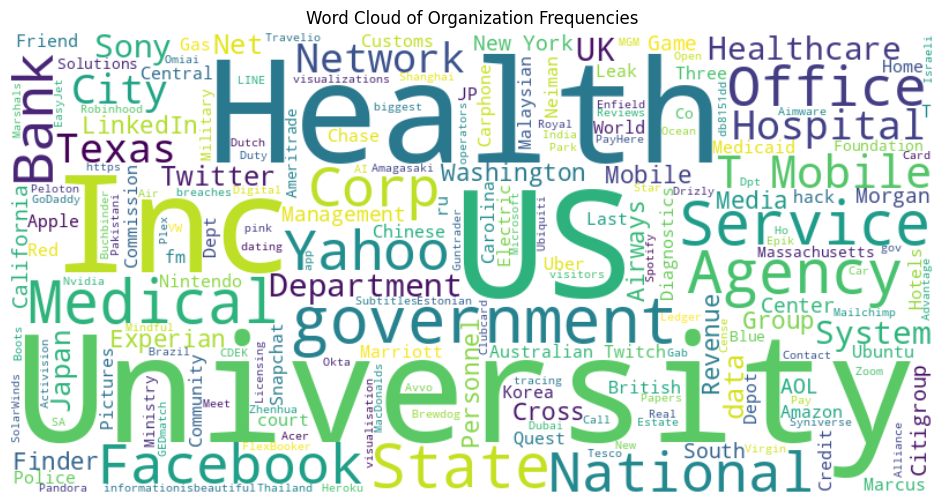

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("data.csv")
text = ' '.join([org for org in data['organisation']])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Organization Frequencies')
plt.axis('off')
plt.show()


**9.	What insights can be gleaned regarding the distribution of data breaches across different sectors and geographical regions? – Heat map**

In [ ]:

import pandas as pd
import plotly.express as px
df = pd.read_csv('data.csv')
df.columns = df.columns.str.strip()
heatmap_data_time = df.pivot_table(index='year', columns='organisation', values='records lost', aggfunc='sum')
heatmap_data_time = heatmap_data_time.fillna(0)  # Fill NaN values with 0
fig_time = px.imshow(heatmap_data_time, x=heatmap_data_time.columns, y=heatmap_data_time.index,
                     color_continuous_scale='Viridis', title='Heatmap of Breaches Over Time')
fig_time.show()
heatmap_data_geo = df.pivot_table(index='sector', columns='organisation', values='records lost', aggfunc='sum')
heatmap_data_geo = heatmap_data_geo.fillna(0)  # Fill NaN values with 0
fig_geo = px.imshow(heatmap_data_geo, x=heatmap_data_geo.columns, y=heatmap_data_geo.index,
                    color_continuous_scale='Viridis', title='Heatmap of Breaches by Geographical Regions')
fig_geo.show()




**10.	What insights can be gained regarding the distribution of breach impact across different sectors or organization sizes ? – Tree map**

In [ ]:

import pandas as pd
import plotly.express as px
import numpy as nP
df = pd.read_csv('data.csv')
df.columns = df.columns.str.strip()
df['records lost'] = pd.to_numeric(df['records lost'], errors='coerce')
if 'sector' in df.columns:
    treemap_data = df.groupby('sector')['records lost'].sum().reset_index()
    title = 'Breach Impact by Sector'
    hierarchy = 'sector'
else:
    treemap_data = df.groupby('organisation')['records lost'].sum().reset_index()
    title = 'Breach Impact by Organization Size'
    hierarchy = 'organisation'
fig_treemap = px.treemap(treemap_data, path=[hierarchy], values='records lost',
                         title=title, template='plotly_dark')
fig_treemap.show()

**11.	What organization experienced the highest total number of records lost due to data breaches, and how does it compare to other organizations?—Box plot**

In [ ]:

import pandas as pd
import plotly.express as px
df = pd.read_csv('data.csv')
df.columns = df.columns.str.strip()
fig_boxplot = px.box(df, x='sector', y='records lost', title='Distribution of Records Lost Across Sectors')
fig_boxplot.update_layout(xaxis_title='Sector', yaxis_title='Records Lost')
fig_boxplot.show()